## Getting World Map Countries Indicators

#### Importing Dependencies

In [1]:
import tradingeconomics as te
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas
import pycountry 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from urllib.parse import quote
from tradingeconomics import functions as fn
from tradingeconomics import glob as glob

#### API login


In [2]:
te.login() # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

# Function

In [17]:
def get_world_location_indicators(indicator):
    def getIndicatorData(indicator=None, output_type=None):
        d = {
            'url_base': 'https://api.tradingeconomics.com/country',
            'country': '/all',
            'indicator_tag' : f'/{quote(indicator)}',
            'key': f'?c={glob.apikey}',
            'output_type' : ''
        }

        api_url_request = "%s%s%s%s" % (d['url_base'], d['country'],d['indicator_tag'],  d['key']) 
        return fn.dataRequest(api_request=api_url_request, output_type=output_type)

#     indicator = 'Inflation Rate'
    
    
    df = getIndicatorData(indicator = indicator, output_type = 'df')
    df

    countriesWithoutISO = []

    missing_countries = {
        'Bolivia' : 'Bolivia, Plurinational State of',
    'Cape Verde' : 'Cabo Verde',
    'Cayman Islands      '  : 'Cayman Islands',   
    'Czech Republic' : 'Czechia',
    'European Union' : 'European Union',
    "Ivory Coast" : "Côte d'Ivoire",
    'Laos' : "Lao People's Democratic Republic",
    'Macau' : 'Macao',
    'Macedonia' : 'North Macedonia',
    'Moldova' : 'Moldova, Republic of',
    'Norway              '   : 'Norway',            
    'Republic of the Congo' : 'Congo, The Democratic Republic of the',
    'Russia' : 'Russian Federation',
    'Singapore           '  : 'Singapore',          
    'South Korea' : 'Korea, Republic of',
    'St Vincent and the Grenadines' : 'Saint Vincent and the Grenadines',
    'Swaziland' : 'Eswatini',
    'Sweden              ' : 'Sweden',              
    'Taiwan' : 'Taiwan, Province of China',
    'Tanzania' : 'Tanzania, United Republic of',
    'Turkey ': 'Turkey', 
    'Venezuela' : 'Venezuela, Bolivarian Republic of',
    'Vietnam' : 'Viet Nam',
    'United States ': 'United States',
    'Brunei': 'Brunei Darussalam',
        'East Timor': 'Timor-Leste',
        'Guinea Bissau': 'Guinea-Bissau',
        'Iran': 'Iran, Islamic Republic of',
        'North Korea': "Korea, Democratic People's Republic of",
        'Palestine': "Palestine, State of",
        'St Kitts and Nevis': 'Saint Kitts and Nevis',
        'St Lucia': 'Saint Lucia',
        'St Vincent And The Grenadines': 'Saint Vincent and the Grenadines',
        'Syria':'Syrian Arab Republic',
        'Kosovo': 'Republic of Kosovo'
    }

    def get_iso3(country_full_name):
                """
                    returns country symbol iso alpha 3 format 
                """
                symbol = None
                iso = pycountry.countries.get(name=country_full_name)
                if iso != None:
                    symbol = iso.alpha_3
                else:
                    if country_full_name not in countriesWithoutISO:
                        countriesWithoutISO.append(country_full_name)
#                         print('Failed to get ISO for: ' + country_full_name)
                return symbol

    iso3_countries_names = []
    corrected_countries_names_list = df['Country'].replace(missing_countries)   
    df_corrected_countries_names = pd.DataFrame(corrected_countries_names_list)
    df_corrected_countries_names['value'] = df['LatestValue']

    for item in df_corrected_countries_names['Country']:
        iso3_countries_names.append(get_iso3(item))

    df_corrected_countries_names['iso3'] = iso3_countries_names
    df_corrected_countries_names

    country_values = df_corrected_countries_names[['value','iso3']]
    country_values = country_values.rename(columns={"iso3":"iso_a3"})
    country_values

    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

    country_shapes = world[['geometry', 'iso_a3']]


    country_shapes = country_shapes.merge(country_values, on='iso_a3', how='outer')

    fig, ax = plt.subplots(1, 1, figsize=(20,10))

    country_shapes.plot(column='value',
               ax=ax,
               legend=True,
               legend_kwds={'label': "Indicator per country",
                            'orientation': "vertical"},
                missing_kwds={'color': 'lightgrey'},
                       )

# Request

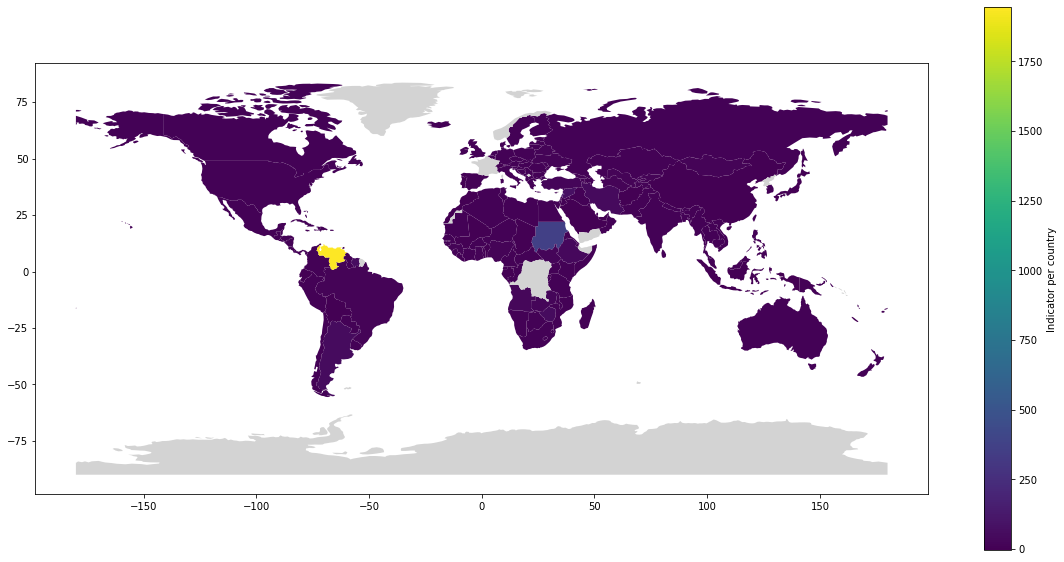

In [18]:
get_world_location_indicators(indicator='inflation rate')

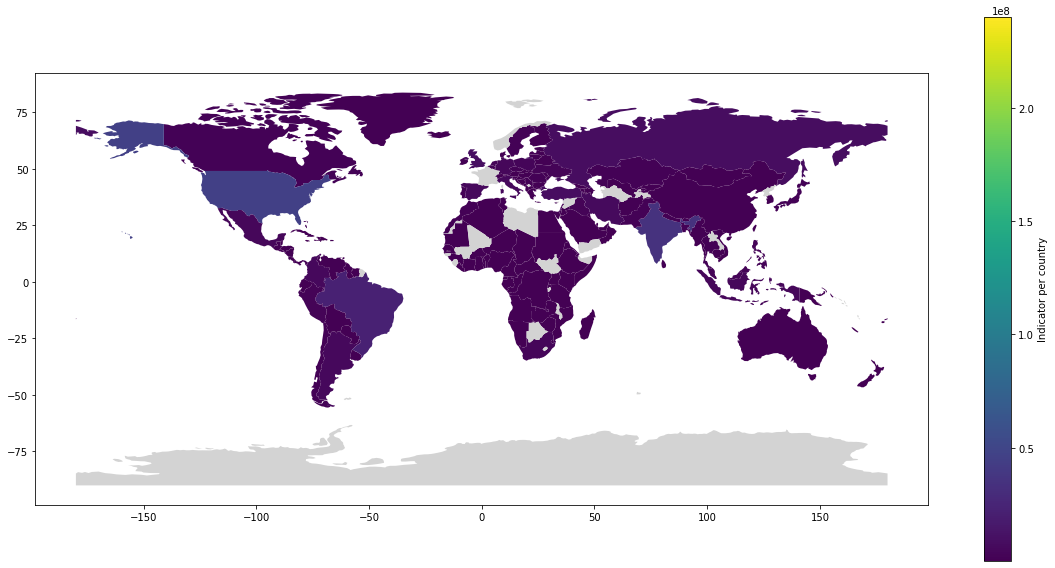

In [19]:
get_world_location_indicators(indicator='Coronavirus Cases')

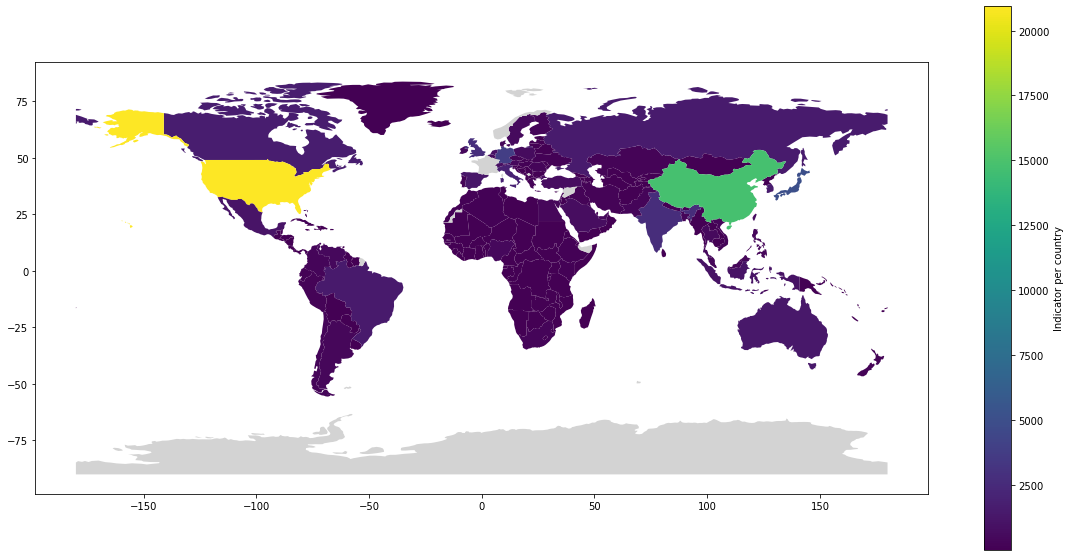

In [20]:
get_world_location_indicators(indicator='GDP')

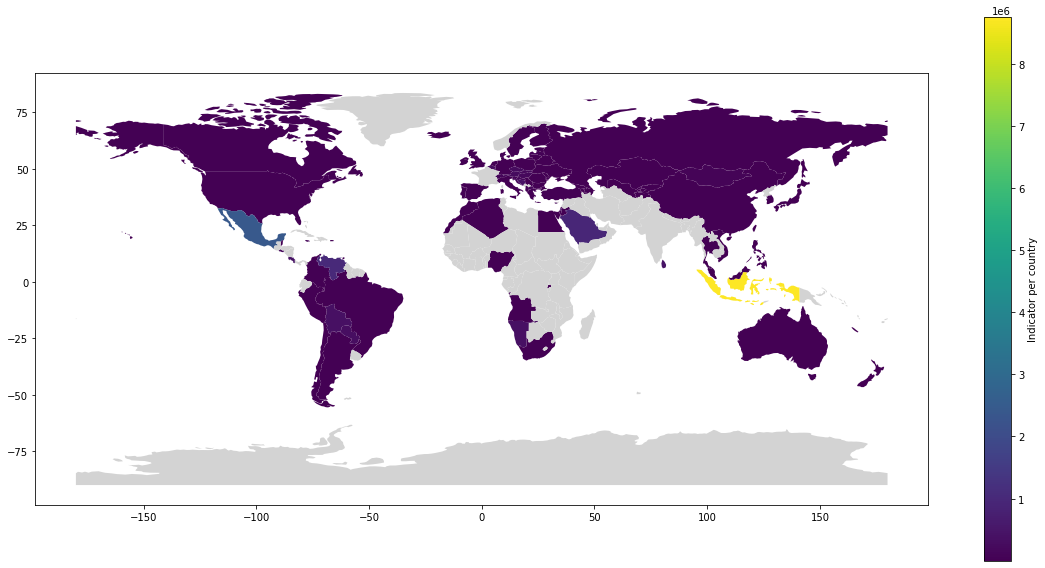

In [21]:
get_world_location_indicators(indicator='Unemployed Persons')